https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [58]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree

In [12]:
df = pd.read_csv('../data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [13]:
df = pd.get_dummies(df)

In [14]:
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


### 3. Divide en train y test

In [15]:
X = df.drop(["actual"],1)
X.shape

(348, 17)

In [16]:
y = df["actual"]
y.shape

(348,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [18]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [19]:
X_test

,year,month,day,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
255,2016,9,29,69,68,66.1,63,71,68,57,0,0,0,0,1,0,0
114,2016,4,27,59,60,60.7,59,65,60,50,0,0,0,0,0,0,1
314,2016,11,28,53,48,48.0,46,48,49,44,0,1,0,0,0,0,0
268,2016,10,12,60,62,61.0,60,63,63,52,0,0,0,0,0,0,1
167,2016,6,19,67,65,70.4,69,73,70,58,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2016,4,6,60,57,56.8,53,59,57,64,0,0,0,0,0,0,1
180,2016,7,2,73,76,73.3,70,77,73,84,0,0,1,0,0,0,0
183,2016,7,5,71,68,74.0,72,77,74,62,0,0,0,0,0,1,0
197,2016,7,19,80,73,76.6,76,78,77,90,0,0,0,0,0,1,0


In [21]:
y_pred = model.predict(X_test)

In [41]:
y_pred.shape

(70,)

In [43]:
y_test.shape

(70,)

In [54]:
def mean_absolute_error(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred)))

In [55]:
mean_absolute_error(y_test, y_pred)

4.885714285714286

### 6. Calcula su MAPE
Sin usar sklearn

In [56]:
def mean_absolute_percentage_error(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / y_pred)) * 100

In [57]:
mean_absolute_percentage_error(y_test, y_pred)

8.242840307314884

### 7. Representa el árbol de decision

2.67999999999999, 'mse = 0.0\nsamples = 3\nvalue = 59.0'),
 Text(161.22540983606558, 114.75999999999999, 'X[4] <= 61.5\nmse = 0.64\nsamples = 5\nvalue = 60.6'),
 Text(159.8532786885246, 102.67999999999999, 'mse = 0.0\nsamples = 3\nvalue = 60.0'),
 Text(162.59754098360656, 102.67999999999999, 'X[3] <= 60.5\nmse = 0.25\nsamples = 2\nvalue = 61.5'),
 Text(161.22540983606558, 90.6, 'mse = 0.0\nsamples = 1\nvalue = 62.0'),
 Text(163.96967213114755, 90.6, 'mse = 0.0\nsamples = 1\nvalue = 61.0'),
 Text(145.6174180327869, 163.07999999999998, 'mse = 0.0\nsamples = 2\nvalue = 68.0'),
 Text(185.75225409836065, 175.16, 'X[7] <= 71.5\nmse = 16.354\nsamples = 36\nvalue = 66.083'),
 Text(177.34795081967215, 163.07999999999998, 'X[7] <= 66.5\nmse = 13.902\nsamples = 28\nvalue = 65.25'),
 Text(170.83032786885246, 151.0, 'X[4] <= 65.5\nmse = 12.667\nsamples = 9\nvalue = 67.667'),
 Text(169.45819672131148, 138.92000000000002, 'X[6] <= 58.5\nmse = 6.688\nsamples = 8\nvalue = 66.75'),
 Text(165.34180327868

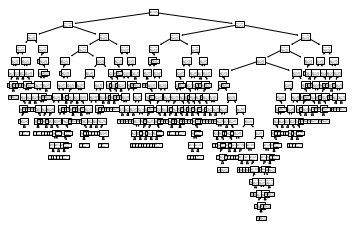

In [59]:
tree.plot_tree(model) 

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [61]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular si MAE

In [62]:
y_pred = model.predict(X_test)


In [63]:
mean_absolute_error(y_test, y_pred)
  

4.5567196265742504

### 10. Vuelve a representar su árbol

[Text(167.4, 190.26, 'X[4] <= 59.5\nmse = 138.218\nsamples = 278\nvalue = 62.342'),
 Text(83.7, 135.9, 'X[5] <= 46.85\nmse = 43.932\nsamples = 116\nvalue = 51.414'),
 Text(41.85, 81.53999999999999, 'X[4] <= 44.5\nmse = 19.984\nsamples = 32\nvalue = 43.375'),
 Text(20.925, 27.180000000000007, 'mse = 10.055\nsamples = 17\nvalue = 41.059'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 18.267\nsamples = 15\nvalue = 46.0'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 55.5\nmse = 19.059\nsamples = 84\nvalue = 54.476'),
 Text(104.625, 27.180000000000007, 'mse = 10.728\nsamples = 54\nvalue = 52.444'),
 Text(146.475, 27.180000000000007, 'mse = 13.249\nsamples = 30\nvalue = 58.133'),
 Text(251.10000000000002, 135.9, 'X[4] <= 67.5\nmse = 58.991\nsamples = 162\nvalue = 70.167'),
 Text(209.25, 81.53999999999999, 'X[7] <= 64.5\nmse = 22.059\nsamples = 63\nvalue = 64.063'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 16.974\nsamples = 27\nvalue = 61.37'),
 Text(230.175, 27.

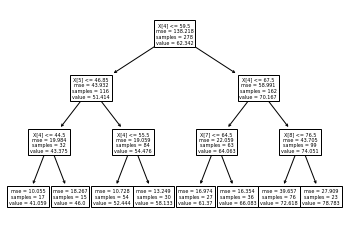

In [65]:
tree.plot_tree(model) 

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [66]:
feature_list = list(df.columns)
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: temp_1               Importance: 0.88
Variable: average              Importance: 0.09
Variable: forecast_acc         Importance: 0.02
Variable: forecast_noaa        Importance: 0.01
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0
Variable: temp_2               Importance: 0.0
Variable: actual               Importance: 0.0
Variable: forecast_under       Importance: 0.0
Variable: friend               Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]